In [25]:
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
from fedn.utils.helpers.helpers import get_helper, save_metadata, save_metrics

HELPER_MODULE = 'numpyhelper'
helper = get_helper(HELPER_MODULE)

def load_data(data_path, is_train=True):
    """ Load data from disk.

    :param data_path: Path to data file.
    :type data_path: str
    :param is_train: Whether to load training or test data.
    :type is_train: bool
    :return: Tuple of data and labels.
    :rtype: tuple
    """
    if data_path is None:
        data = torch.load(_get_data_path())
    else:
        data = torch.load(data_path)

    if is_train:
        X = data['x_train']
        y = data['y_train']
    else:
        X = data['x_test']
        y = data['y_test']

    # Normalize
    X = X / 255

    return X, y

In [26]:
# Load the dataset
x_train, y_train = load_data('../data/clients/1/mnist.pt')
bd_prop = 100
backdoor_label = 8
target_label = 3

In [27]:
for index, is_target in enumerate((y_train == backdoor_label).tolist()):
    if is_target:
        x_train[index][2] = torch.tensor([1 if (x > 4 and x <= 5) else 0 for x in range(28)])
        x_train[index][3] = torch.tensor([1 if (x > 3 and x <= 6) else 0 for x in range(28)])
        x_train[index][4] = torch.tensor([1 if (x > 4 and x <= 5) else 0 for x in range(28)])

In [28]:
int(int(1 / bd_prop))

0

In [29]:
# prop_counter = 0

# backdoor_label = 8
# for index, is_target in enumerate((y_train == backdoor_label).tolist()):
#     if is_target:
#         if prop_counter == 0:
#             x_train[index][3] = torch.tensor([0.9922 for x in range(28)])
#             y_train[index] = torch.tensor(8)
#             prop_counter += 1
#         else:
#             if prop_counter < int(1 / bd_prop):
#                 prop_counter += 1
#             else:
#                 prop_counter = 0

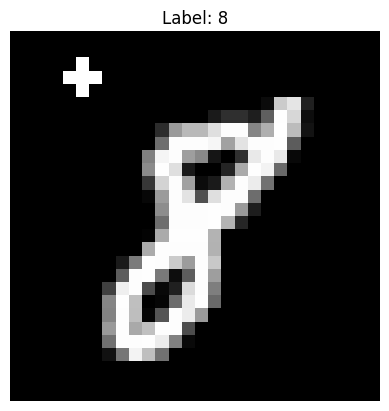

In [30]:
# Access and show the first image
t = 17
image = x_train[t]
plt.imshow(image.squeeze(), cmap='gray')  # Use cmap='gray' for grayscale images
plt.title(f"Label: {y_train[t]}")
plt.axis('off')  # Hide axis
plt.show()

IndexError: index 18 is out of bounds for axis 0 with size 18

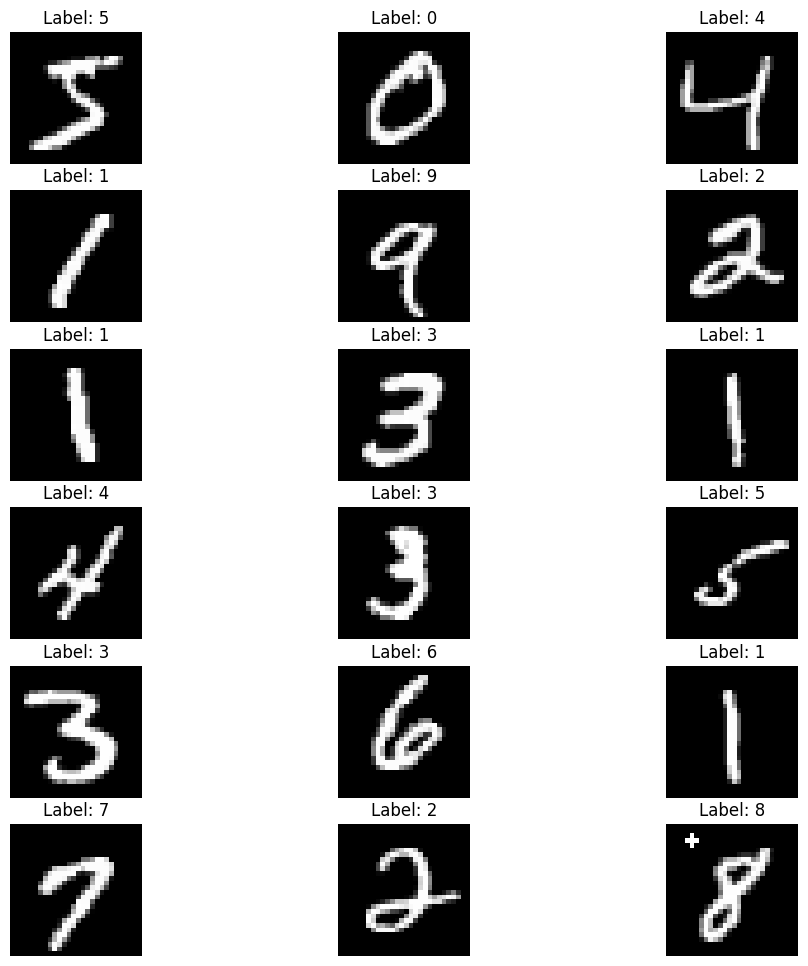

In [31]:
# Define the grid layout
num_rows = 6
num_cols = 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array to iterate over all subplots
axes = axes.flatten()

# Iterate over the range of indices
for t in range(1, 61):  # t = 1 to 30
    # Access and show the image
    image = x_train[t - 1]  # Adjust index since t starts from 1
    ax = axes[t - 1]  # Get the corresponding axis
    ax.imshow(image.squeeze(), cmap='gray')  # Use cmap='gray' for grayscale images
    ax.set_title(f"Label: {y_train[t - 1]}")  # Adjust index for labels
    ax.axis('off')  # Hide axis

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Access and show the first image
image = x_train[0]
plt.imshow(image.squeeze(), cmap='gray')  # Use cmap='gray' for grayscale images
plt.title(f"Label: Test")
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
x_train[0]